# Vancouver Airbnb Rental Listings Price Analysis

Prepared By: Sinchita Siddiquee  
Submission Date: November 2, 2019

## 1. Project Overview

This project analyzes the effect of various factors such as location and accommodation size on the price of Airbnb rental listings in the Vancouver Area. Then, a Linear Regression model is developed and trained that can predict the price of rental listings based on the accommodation size, location and room type.

The dataset used in this project was collected from this website: http://insideairbnb.com/get-the-data.html

In [1]:
# Importing required Python packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
listing = pd.read_csv('vancouver-airbnb-data/listings.csv')
listing.head(3)

,id,name,host_id,host_name,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month
0,5731,Mai Lodging - Room Single bed 5,9187,Mai,f,Kensington-Cedar Cottage,7.0,7.0,f,Kensington-Cedar Cottage,...,Private room,1,0.0,1.0,1.0,$38.00,2,30,103,0.81
1,10080,D1 - Million Dollar View 2 BR,30899,Rami,f,Coal Harbour,41.0,41.0,t,Downtown,...,Entire home/apt,6,2.0,2.0,4.0,$150.00,60,1124,16,0.17
2,13188,Garden level studio in ideal loc.,51466,Family Guns,t,Riley Park,2.0,2.0,t,Riley Park,...,Entire home/apt,4,1.0,0.0,2.0,$121.00,2,180,218,1.87


## 2. Data Cleaning and Manipulation

Firstly, some insights into the size of the data set and the data types of its columns will be generated.

In [3]:
# Number of rows and columns in the dataset
listing.shape

(6176, 25)

In [4]:
# Identifying the data type of each column
listing.dtypes

id                             int64
name                          object
host_id                        int64
host_name                     object
host_is_superhost             object
host_neighbourhood            object
host_listings_count          float64
host_total_listings_count    float64
host_identity_verified        object
neighbourhood_cleansed        object
neighbourhood_group          float64
city                          object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
price                         object
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
reviews_per_month            float64
dtype: object

From the list above, it can be seen that all the columns have the expected data type except for the price column. Currently, the price column has the data type of object (i.e. string) but it needs to be a numeric column for analysis and modelling. The code below will change the values in the price column from string to float. 

In [5]:
listing['price'] = listing['price'].str.replace('$', '')
listing['price'] = listing['price'].str.replace(',', '')
listing['price'] = listing['price'].astype(float)
listing.head(3)

,id,name,host_id,host_name,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month
0,5731,Mai Lodging - Room Single bed 5,9187,Mai,f,Kensington-Cedar Cottage,7.0,7.0,f,Kensington-Cedar Cottage,...,Private room,1,0.0,1.0,1.0,38.0,2,30,103,0.81
1,10080,D1 - Million Dollar View 2 BR,30899,Rami,f,Coal Harbour,41.0,41.0,t,Downtown,...,Entire home/apt,6,2.0,2.0,4.0,150.0,60,1124,16,0.17
2,13188,Garden level studio in ideal loc.,51466,Family Guns,t,Riley Park,2.0,2.0,t,Riley Park,...,Entire home/apt,4,1.0,0.0,2.0,121.0,2,180,218,1.87


Next, it will be checked if there are any null values in any of the columns. The isnull() and sum() methods are being used to check for the null values.

In [6]:
listing.isnull().sum()

id                              0
name                            1
host_id                         0
host_name                       4
host_is_superhost               4
host_neighbourhood            543
host_listings_count             4
host_total_listings_count       4
host_identity_verified          4
neighbourhood_cleansed          0
neighbourhood_group          6176
city                            1
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       2
bedrooms                        2
beds                            5
price                           0
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
reviews_per_month             791
dtype: int64

All the values in the neighbourhood_group column are null as confirmed below.

In [7]:
listing.neighbourhood_group.unique()

array([nan])

Therefore, the neighbourhood_group column will be dropped from the data set. In addition to neighbourhood_group, some of the other columns are not relevant to this project and will therefore be dropped.

In [8]:
listing.drop(['id',
              'host_name',
              'host_is_superhost',
              'host_neighbourhood',
              'host_identity_verified',
              'host_listings_count',
              'host_total_listings_count',
              'neighbourhood_group','city',
              'number_of_reviews',
              'property_type'], axis=1, inplace=True)

listing.head(3)

,name,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month
0,Mai Lodging - Room Single bed 5,9187,Kensington-Cedar Cottage,49.24788,-123.06537,Private room,1,0.0,1.0,1.0,38.0,2,30,0.81
1,D1 - Million Dollar View 2 BR,30899,Downtown,49.28772,-123.12110,Entire home/apt,6,2.0,2.0,4.0,150.0,60,1124,0.17
2,Garden level studio in ideal loc.,51466,Riley Park,49.24577,-123.10516,Entire home/apt,4,1.0,0.0,2.0,121.0,2,180,1.87


In [9]:
# Checking the remaining null values in the data set
listing.isnull().sum()

name                        1
host_id                     0
neighbourhood_cleansed      0
latitude                    0
longitude                   0
room_type                   0
accommodates                0
bathrooms                   2
bedrooms                    2
beds                        5
price                       0
minimum_nights              0
maximum_nights              0
reviews_per_month         791
dtype: int64

The null values in the reviews_per_month column mean that no reviews were posted for those listings. This can be easily handled by replacing the null values in that column with 0.

In [10]:
listing.fillna({'reviews_per_month': 0.0}, inplace=True)
listing.isnull().sum()

name                      1
host_id                   0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
bathrooms                 2
bedrooms                  2
beds                      5
price                     0
minimum_nights            0
maximum_nights            0
reviews_per_month         0
dtype: int64

Having 0 bedrooms or beds or bathrooms for a rental space indicate that there is probably something wrong with those records. Therefore, rows with such null values will be deleted from the data set.

In [11]:
listing.dropna(inplace = True)
listing.isnull().sum()

name                      0
host_id                   0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
maximum_nights            0
reviews_per_month         0
dtype: int64

In [12]:
listing.shape

(6167, 14)

In [13]:
listing.describe()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month
count,6.167000e+03,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,1.003712e+08,49.260397,-123.111338,3.562186,1.343198,1.533323,1.900114,181.910653,12.279552,688.108643,2.212006
std,9.598785e+07,0.021492,0.039456,2.205318,0.686198,1.118716,1.277850,278.300044,34.694842,594.937372,2.241314
min,6.033000e+03,49.202900,-123.218600,1.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,0.000000
25%,1.453424e+07,49.246350,-123.130495,2.000000,1.000000,1.000000,1.000000,87.000000,1.000000,45.000000,0.360000
50%,6.352756e+07,49.265370,-123.115170,3.000000,1.000000,1.000000,2.000000,130.000000,2.000000,1125.000000,1.500000
75%,1.839752e+08,49.278595,-123.087495,4.000000,1.500000,2.000000,2.000000,200.000000,7.000000,1125.000000,3.510000
max,2.950238e+08,49.293120,-123.017810,24.000000,8.500000,30.000000,15.000000,12800.000000,998.000000,10000.000000,17.620000


From the values above, one can observe that some values have unusually high values. For example, the minimum_nights for some listings appear to be 998 which is not a common situation. Therefore, such values will be excluded from the data set.

In [14]:
listing.drop(listing[listing.accommodates > 20].index, inplace=True)
listing.drop(listing[listing['minimum_nights'] > 500].index, inplace=True)
listing.drop(listing[listing['maximum_nights'] > 5000].index, inplace=True)

## 3. Exploratory Data Analysis

Distribution of Vancouver Airbnb Rental prices is shown below:

C:\Users\Sinchita Siddiquee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Price Distribution Plot')

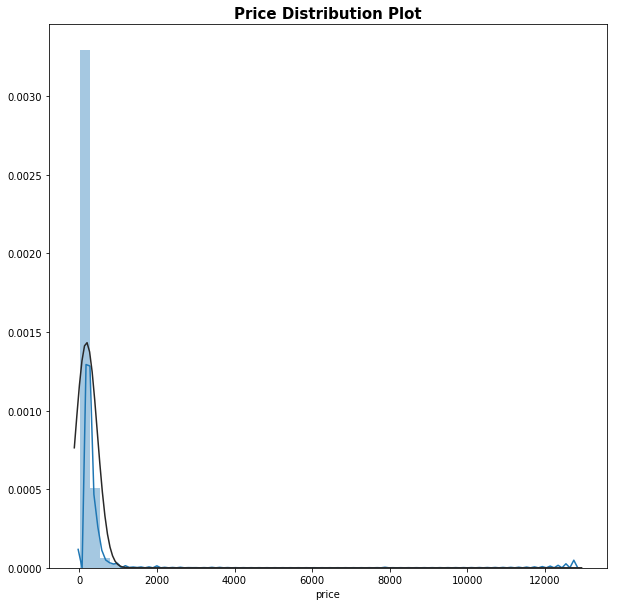

In [15]:
from scipy.stats import norm

plt.figure(figsize=(10,10))
sns.distplot(listing['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

A new column called log_price will be added that takes the natural log of the price.

In [16]:
listing['log_price'] = np.log10(listing['price'])
listing.head(3)

,name,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,log_price
0,Mai Lodging - Room Single bed 5,9187,Kensington-Cedar Cottage,49.24788,-123.06537,Private room,1,0.0,1.0,1.0,38.0,2,30,0.81,1.579784
1,D1 - Million Dollar View 2 BR,30899,Downtown,49.28772,-123.12110,Entire home/apt,6,2.0,2.0,4.0,150.0,60,1124,0.17,2.176091
2,Garden level studio in ideal loc.,51466,Riley Park,49.24577,-123.10516,Entire home/apt,4,1.0,0.0,2.0,121.0,2,180,1.87,2.082785


Below, we will see how the distribution varies for price_log. The plot shows that price_log has a more normal distribution.

Text(0.5, 1.0, 'Log-Price Distribution Plot')

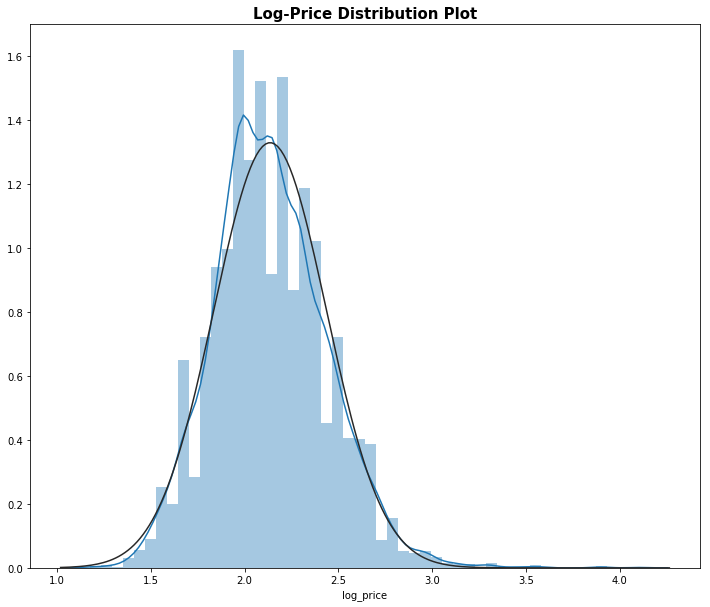

In [17]:
plt.figure(figsize=(12,10))
sns.distplot(listing['log_price'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

At first, the relationship between the number of people the rental accommodates and the price will be analyzed using a scatter plot.

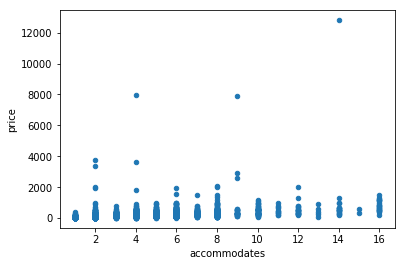

In [18]:
ax = plt.gca()
listing.plot(kind='scatter',x='accommodates',y='price',ax=ax)

The price and the number of people accommodated does not seem to have a linear relationship.

Next, the relationship between log_price and accommodation size will be plotted.

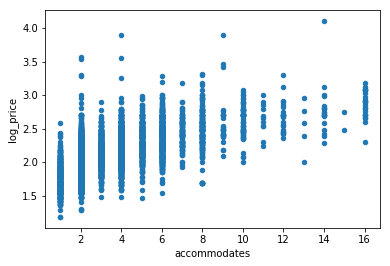

In [19]:
ax = plt.gca()
listing.plot(kind='scatter',x='accommodates',y='log_price',ax=ax)

From the plots, it is clear that the log_price has a more linear relationship with the accommodates column.

Next, the categorical variable room_type and neighbourhood_cleansed will be used to generate numeric columns that will be used in the correlation analysis.

The hypothesis is that the the price of rentals tend to be higher for entire home/apt type properties as well as properties located in the Downtown area. The first new column entire_place will have a value of 1 for rows that have the room_type as "Entire home/apt". The second new column is_downtown will have a value of 1 for rows that have the neighbourhood_cleansed value as Downtown.

In [20]:
listing['is_downtown'] = np.where(listing['neighbourhood_cleansed'].str.contains('Downtown'), 1, 0)
listing['entire_place'] = np.where(listing['room_type'].str.contains('Entire home/apt'), 1, 0)

listing.head(3)

,name,host_id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,log_price,is_downtown,entire_place
0,Mai Lodging - Room Single bed 5,9187,Kensington-Cedar Cottage,49.24788,-123.06537,Private room,1,0.0,1.0,1.0,38.0,2,30,0.81,1.579784,0,0
1,D1 - Million Dollar View 2 BR,30899,Downtown,49.28772,-123.12110,Entire home/apt,6,2.0,2.0,4.0,150.0,60,1124,0.17,2.176091,1,1
2,Garden level studio in ideal loc.,51466,Riley Park,49.24577,-123.10516,Entire home/apt,4,1.0,0.0,2.0,121.0,2,180,1.87,2.082785,0,1


A correlation matrix will be generated to view the correlation among the various factors.

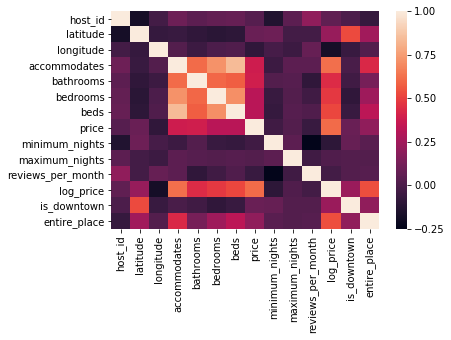

In [21]:
sns.heatmap(listing.corr().round(2))

## 4. Data Modelling - Linear Regression Model

In [22]:
import statsmodels.formula.api as smf

listing_reg = smf.ols(data=listing, formula="log_price ~ accommodates + entire_place + is_downtown").fit()
listing_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2089.
Date:                Sat, 02 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:57:30   Log-Likelihood:                 833.68
No. Observations:                6158   AIC:                            -1659.
Df Residuals:                    6154   BIC:                            -1632.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7276      0.006    296.401      0.000       1.716       1.739
accommodates     0.0682      0.001     49.935      0.000       0.066       0.071
entire_place     0.1901      0.007     28.463      0.000       0.177       0.203
is_downtown      0.1212      0.006     19.281      0.000       0.109       0.133
==============================================================================
Omnibus:                      794.466   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3056.351
Skew:                           0.606   Prob(JB):                         0.00
Kurtosis:                       6.231   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

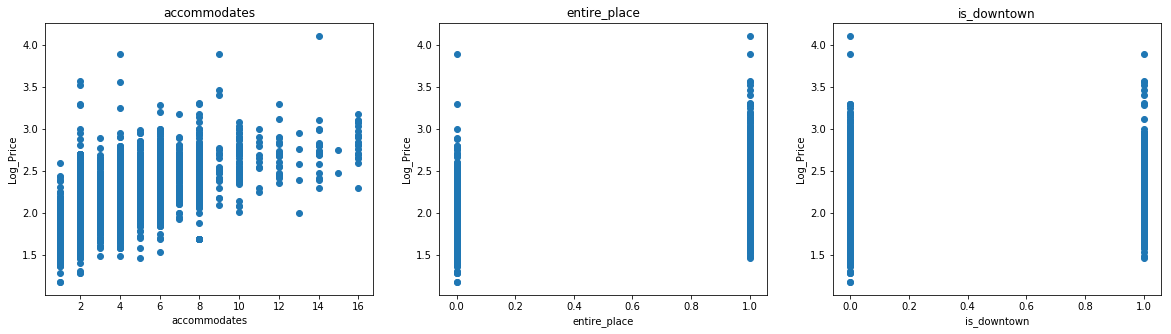

In [23]:
plt.figure(figsize=(20, 5))

features = ['accommodates', 'entire_place', 'is_downtown']
target = listing['log_price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) ,i+1)
    x = listing[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Log_Price')

In [24]:
# Prepare the data for training

X = pd.DataFrame(np.c_[listing['accommodates'], listing['entire_place'], listing['is_downtown']], columns = ['accommodates','entire_place','is_downtown'])

Y = listing['log_price']

In [25]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assigns random state to any value. This ensures consistency.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4926, 3)
(1232, 3)
(4926,)
(1232,)


In [26]:
# train the model using sklearn LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
mae = mean_absolute_error(Y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set 

y_test_predict = lin_model.predict(X_test)

# mean absolute error pf the model
mae = mean_absolute_error(Y_test, y_test_predict)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MAE is 0.16091244870771734
RMSE is 0.2101523948878755
R2 score is 0.5072761606378229


The model performance for testing set
--------------------------------------
MAE is 0.16538063411337459
RMSE is 0.2160583185635354
R2 score is 0.4933878952418158


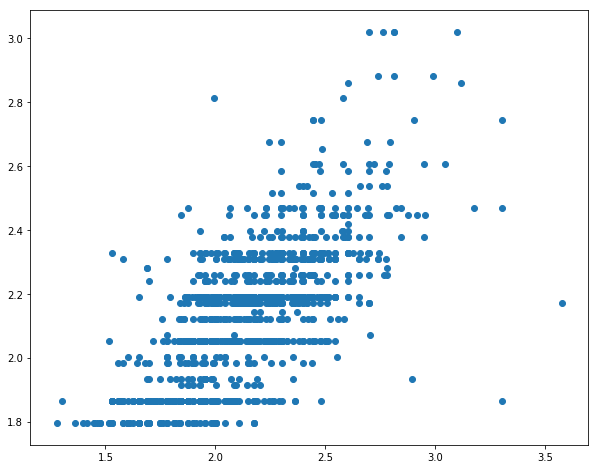

In [28]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.figure(figsize=(10,8))
plt.scatter(Y_test, y_test_predict)
plt.show()

## 5. Conclusion

The Vancouver Airbnb data set was used to train a Linear Regression model that can predict the prices of Airbnb rentals based on the number of people it accommodates, location and room type. 

The model returned the following values for the test data: 
   
   MAE: 0.16538063411337459; RMSE: 0.2160583185635354; R2 score: 0.4933878952418158

The scores show that this is not a perfect model and there is a lot of room for improvement such as using a larger data set or developing a different type of model.